In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Phishing_Email.csv')
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
df.shape

(18650, 3)

In [7]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [8]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [9]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [10]:
print(df.shape)

(17538, 2)


In [11]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [12]:
email_type = {'Safe Email' : 'Safe Email', 'Phishing Email' : 'Phishing Email'}
type_counts = df['Email Type'].map(email_type).value_counts()
print(type_counts)

Email Type
Safe Email        10980
Phishing Email     6558
Name: count, dtype: int64


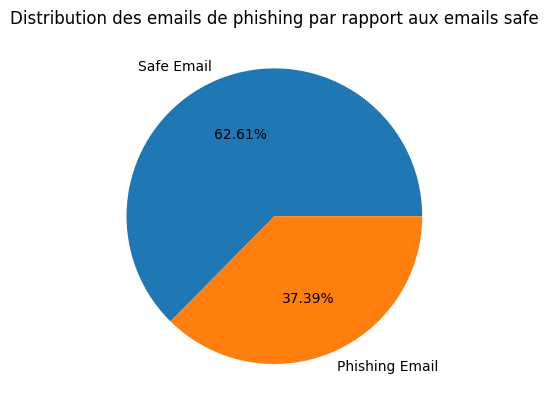

In [13]:
plt.pie(type_counts, labels=type_counts.index, autopct='%0.2f%%')
plt.title('Distribution des emails de phishing par rapport aux emails safe')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Email Type'] = le.fit_transform(df['Email Type'])

In [15]:
df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0
...,...,...
18644,\nRick Moen a Ã©crit:> > I'm confused. I thou...,1
18645,date a lonely housewife always wanted to date ...,0
18646,request submitted : access request for anita ....,1
18647,"re : important - prc mtg hi dorn & john , as y...",1


In [16]:
def clean_text(words):
    words = words.lower()
    words = re.sub(r'[^\w\s]', '', words)
    words = re.sub(r'http\S+', '', words)
    words = re.sub(r'\s+', ' ', words).strip()
    return words

In [17]:
df['Cleaned Email Text'] = df['Email Text'].apply(clean_text)
df.head()

,Email Text,Email Type,Cleaned Email Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,re 6 1100 disc uniformitarianism re 1086 sex l...
1,the other side of * galicismos * * galicismo *...,1,the other side of galicismos galicismo is a sp...
2,re : equistar deal tickets are you still avail...,1,re equistar deal tickets are you still availab...
3,\nHello I am your hot lil horny toy.\n I am...,0,hello i am your hot lil horny toy i am the one...
4,software at incredibly low prices ( 86 % lower...,0,software at incredibly low prices 86 lower dra...


In [18]:
from collections import Counter

bad_mails = []

for text in df[df['Email Type'] == 1]['Cleaned Email Text'].dropna().tolist():
    if isinstance(text, str):
        for word in text.split():
            bad_mails.append(word)
            
Counter(bad_mails).most_common(20)

[('the', 240071),
 ('_', 184726),
 ('of', 151442),
 ('to', 132798),
 ('and', 129577),
 ('a', 96748),
 ('in', 93714),
 ('for', 61947),
 ('is', 56604),
 ('on', 45498),
 ('that', 43678),
 ('i', 42459),
 ('be', 38814),
 ('you', 38218),
 ('this', 33954),
 ('it', 32417),
 ('with', 30706),
 ('as', 28668),
 ('are', 28517),
 ('will', 26358)]

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 150

tk = Tokenizer()

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

2025-04-14 16:01:00.024209: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 16:01:00.051842: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 16:01:00.245719: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 16:01:00.246340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 16:01:01.481550: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [20]:
len(vector)

17538

In [21]:
x = np.array(vector)
y = np.array(df["Email Type"])

In [22]:
tf = TfidfVectorizer(stop_words='english',max_features=10000) #dimension reduction
feature_x = tf.fit_transform(df['Email Text']).toarray()

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_x,y,test_size=0.2,random_state=0)

## SGD Classifier

accuracy from logistic regression: 98.55 %
f1 score from logistic regression: 98.82 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.99      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.99      0.99      0.99      3508



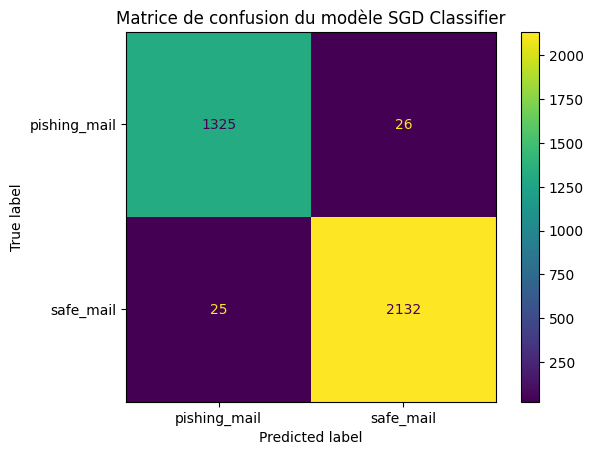

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# passing object
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

# prediction
pred_sgd = sgd.predict(x_test)
# performance
print(f"accuracy from logistic regression: {accuracy_score(y_test, pred_sgd) * 100:.2f} %")
print(f"f1 score from logistic regression: {f1_score(y_test, pred_sgd) * 100:.2f} %")
print("classification report : \n", classification_report(y_test, pred_sgd))

clf_sgd = confusion_matrix(y_test, pred_sgd)
cx_ = ConfusionMatrixDisplay(clf_sgd, display_labels=['pishing_mail', 'safe_mail']).plot()
plt.title("Matrice de confusion du modèle SGD Classifier")
plt.show()

## MLP Classifier

accuracy from MLP:98.57 %
f1 score from MLP: 98.84 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.99      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.99      0.99      0.99      3508



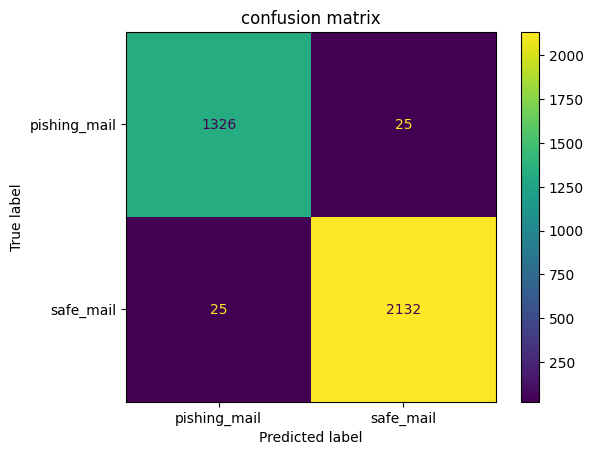

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()  # passing object
mlp.fit(x_train,y_train)

#prediction
pred_mlp = mlp.predict(x_test)

#performance
print(f"accuracy from MLP:{accuracy_score(y_test,pred_mlp)*100:.2f} %")
print(f"f1 score from MLP: {f1_score(y_test,pred_mlp)*100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_mlp))

#confusion matrix
clf_mlp = confusion_matrix(y_test,pred_mlp)
cx_ = ConfusionMatrixDisplay(clf_mlp,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("Matrice de confusion du modèle MLP Classifier")
plt.show()

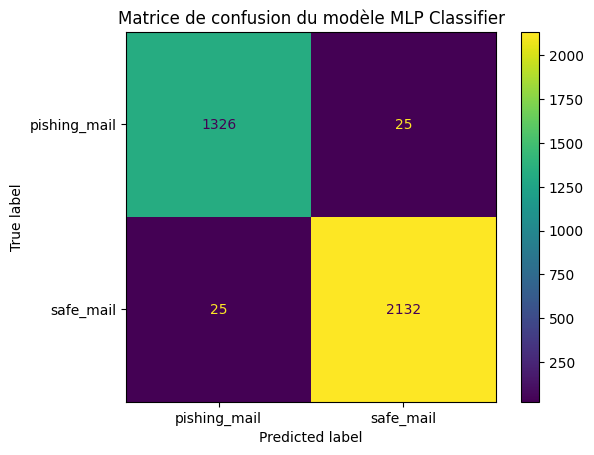

In [44]:
clf_mlp = confusion_matrix(y_test,pred_mlp)
cx_ = ConfusionMatrixDisplay(clf_mlp,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("Matrice de confusion du modèle MLP Classifier")
plt.show()

## Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

accuracy from native bayes: 97.49 %
f1 score from naive bayes: 97.97 %
classification report :

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1351
           1       0.98      0.98      0.98      2157

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



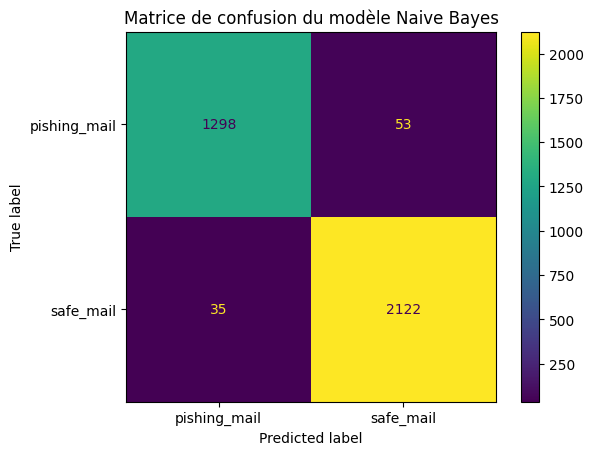

In [42]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
pred_nav = nb.predict(x_test)

# Checking the performance

print(f"accuracy from native bayes: {accuracy_score(y_test,pred_nav)*100:.2f} %")
print(f"f1 score from naive bayes: {f1_score(y_test,pred_nav)*100:.2f} %")
print("classification report :\n\n",classification_report(y_test,pred_nav))

#confusion matrix
clf_nav = confusion_matrix(y_test,pred_nav)
cx_ = ConfusionMatrixDisplay(clf_nav,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("Matrice de confusion du modèle Naive Bayes")
plt.show()

##  Logistic Regression


accuracy from logistic regression:98.03 %
f1 score from logistic regression: 98.41 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1351
           1       0.98      0.99      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



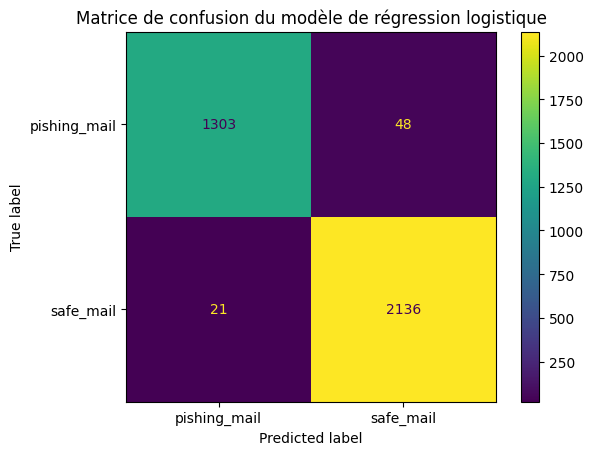

In [41]:
from sklearn.linear_model import LogisticRegression

# passing object
lg = LogisticRegression()
lg.fit(x_train,y_train)

# prediction
pred_lg = lg.predict(x_test)
# performance
print("")
print(f"accuracy from logistic regression:{accuracy_score(y_test,pred_lg)*100:.2f} %")
print(f"f1 score from logistic regression: {f1_score(y_test,pred_lg)*100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_lg))

clf_lg = confusion_matrix(y_test,pred_lg)
cx_ = ConfusionMatrixDisplay(clf_lg,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("Matrice de confusion du modèle de régression logistique")
plt.show()

## LSTM

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 50)           8330200   
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 8390701 (32.01 MB)
Trainable params: 8390701 (32.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
hist=model.fit(x_train, y_train, epochs=5, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/5
877/877 [==============================] - 249s 281ms/step - loss: 0.3620 - accuracy: 0.8428 - val_loss: 0.1896 - val_accuracy: 0.9498
Epoch 2/5
877/877 [==============================] - 251s 287ms/step - loss: 0.2858 - accuracy: 0.8728 - val_loss: 0.5308 - val_accuracy: 0.6961
Epoch 3/5
877/877 [==============================] - 267s 304ms/step - loss: 0.2093 - accuracy: 0.9244 - val_loss: 0.1610 - val_accuracy: 0.9555
Epoch 4/5
877/877 [==============================] - 257s 293ms/step - loss: 0.1292 - accuracy: 0.9679 - val_loss: 0.2583 - val_accuracy: 0.9262
Epoch 5/5
877/877 [==============================] - 254s 290ms/step - loss: 0.1175 - accuracy: 0.9699 - val_loss: 0.1675 - val_accuracy: 0.9578


In [ ]:
# model.save('phishing_email_detection_model.h5')

In [ ]:
# model = model.load('phishing_email_detection_model.h5')

In [54]:
results = model.evaluate(x_test, y_test)
loss = results[0]  # Extract the loss from the results
accuracy = results[1]  # Extract the accuracy from the results

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy*100}")

110/110 [==============================] - 2s 16ms/step - loss: 0.6926 - accuracy: 0.5168
Model Loss: 0.6925897598266602
Model Accuracy: 51.681870222091675


In [55]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

110/110 [==============================] - 2s 16ms/step


In [56]:
pd.DataFrame(hist.history)

pd.DataFrame(hist.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(hist.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

NameError: name 'hist' is not defined

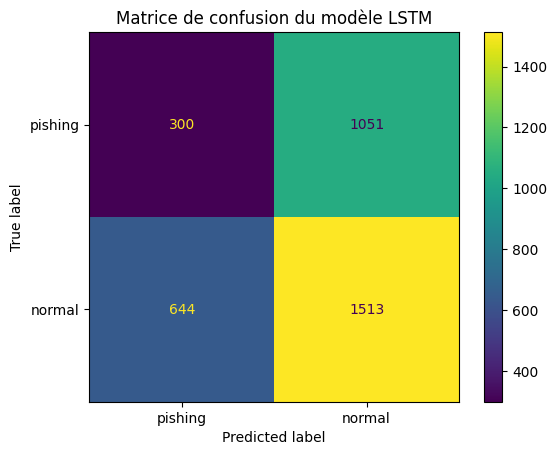

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnf = confusion_matrix(y_test,y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=['pishing','normal'])
ax.plot()
plt.title("Confusion Matrix")
plt.show()

La matrice ci dessus est le resultat d'un test qui n'a pas fonctionne, on refaisant tourne le programme on obtient une matrice beaucoup plus similaire a celle du rapport. Je ne l'ai cependant pas fait car le modele LSTM met environ 50 min a tourne sur mon ordi.

In [30]:
query = ["❒ Notification de suivi de la livraison de votre colis, ID #88749740-593 UPS Suivez vos colis à tout moment, n'importe où SUIVI ➢ ❌ Nous n'avons pas pu livrer votre colis car personne n'était présent pour signer la livraison. ■ Nous avons besoin d'une confirmation d'adresse pour reconfirmer l'envoi du colis. VÉRIFIER ICI Si vous ne souhaitez plus recevoir ces e-mails, vous pouvez vous désabonner en cliquant ici ou en écrivant à"]
query_features = tf.transform(query).toarray()
prediction = sgd.predict(query_features)
if prediction[0] == 1:
    print("Ceci est un email sure")
else:
    print("Ceci est un email de phishing")

Ceci est un email de phishing
